将鱼图像数据进行操作，使用numpy知识

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
# 魔法指令 内嵌画图 将绘制的图转换为静态图片嵌入到cell的输出。在不同的cell进行绘制效果不会叠加。
%matplotlib inline

In [7]:
fish = plt.imread('fish.png')

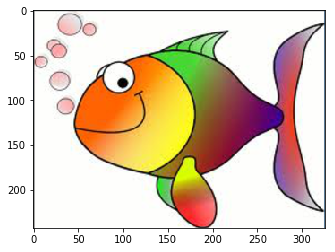

In [8]:
plt.imshow(fish)

In [9]:
fish.shape

(243, 326, 3)

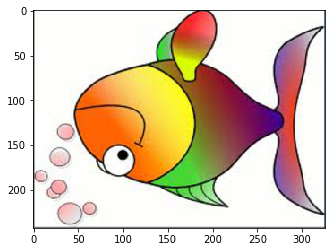

In [14]:
fish2 = fish[::-1]

plt.imshow(fish2)

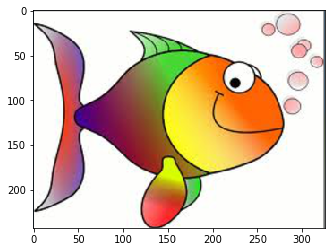

In [11]:
fish3 = fish[::,::-1]
plt.imshow(fish3)

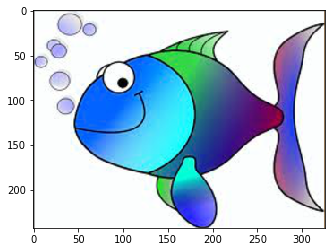

In [15]:
# r g b
# b g r
fish4 = fish[::,::,::-1]
plt.imshow(fish4)

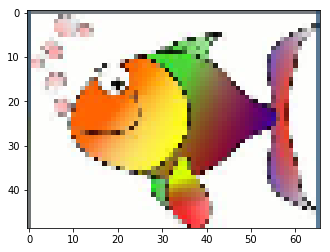

In [18]:
fish5 = fish[::5,::5]
plt.imshow(fish5)

In [23]:
fish6 = fish.copy()

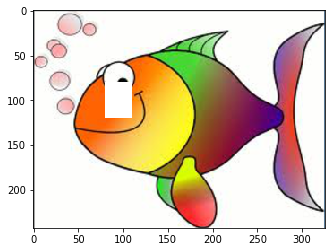

In [24]:
fish6[80:120,80:110] = np.ones((40,30,3))
plt.imshow(fish6)

# Pandas的数据结构



导入pandas：  
三剑客

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pandas import Series,DataFrame

### 1、Series

Series是一种类似与一维数组的对象(必须是一维数组)，由下面两个部分组成：
- values：一组数据（ndarray类型）
- index：相关的数据索引标签

#### 1）Series的创建

两种创建方式：

(1) 由列表或numpy数组创建

    默认索引为0到N-1的整数型索引

In [27]:
n = np.array([0,2,4,6,8])

#Series和ndarray差别，有没有具体的索引，是对ndarray的升级
s = Series(n)
s

0    0
1    2
2    4
3    6
4    8
dtype: int64

In [28]:
#Series包含ndarray
#Series功能就会强大，索引，检索方便很多
s.values

array([0, 2, 4, 6, 8])

In [29]:
n

array([0, 2, 4, 6, 8])

还可以通过设置index参数指定索引

In [31]:
s.index = list('abcde')
s

a    0
b    2
c    4
d    6
e    8
dtype: int64

In [32]:
s = Series(n, index = ['张三','李四','Michael','sara','lisa'])
s

张三         0
李四         2
Michael    4
sara       6
lisa       8
dtype: int64

特别地，由ndarray创建的是引用，而不是副本。对Series元素的改变也会改变原来的ndarray对象中的元素。（列表没有这种情况）

In [33]:
s['张三'] = 100

In [29]:
s

张三         100
李四           2
Michael      4
sara         6
lisa         8
dtype: int64

In [30]:
n

array([100,   2,   4,   6,   8])

(2) 由字典创建

In [2]:
dic = {'a':np.random.randint(0,10,size = (2,3)),
       'b':np.random.randint(0,10,size = (2,3)),
            'c':np.random.randint(0,10,size = (2,3))}

s2 = Series(dic)
s2

a    [[4, 9, 2], [5, 0, 8]]
b    [[5, 5, 2], [9, 0, 2]]
c    [[5, 4, 9], [6, 3, 2]]
dtype: object

============================================

练习1：

使用多种方法创建以下Series，命名为s1：  
语文 150   
数学 150   
英语 150   
理综 300   

============================================

In [3]:
s = Series(data = np.random.randint(0,150,size = 4),index=['语文','数学','英语','Python'])
s

语文         76
数学         70
英语          8
Python    128
dtype: int64

#### 2）Series的索引和切片

可以使用中括号取单个索引（此时返回的是元素类型），或者中括号里一个列表取多个索引（此时返回的仍然是一个Series类型）。分为显示索引和隐式索引：

(1) 显式索引：

    - 使用index中的元素作为索引值
    - 使用.loc[]（推荐）

 注意，此时是闭区间

In [2]:
s = Series(np.random.random(10), index=list('abcdefghij'))
s

a    0.113684
b    0.097007
c    0.836753
d    0.704823
e    0.163219
f    0.901558
g    0.224495
h    0.909198
i    0.748363
j    0.585695
dtype: float64

In [3]:
s['a']

0.11368370027378116

In [4]:
s.loc['c']

0.8367527868480953

(2) 隐式索引：

    - 使用整数作为索引值
    - 使用.iloc[]（推荐）

 注意，此时是半开区间

In [5]:
#ndarray 极其相似
s[0]

0.11368370027378116

In [7]:
s.iloc[0]

0.11368370027378116

In [10]:
#左闭右闭
s.loc['a':'c']

a    0.113684
b    0.097007
c    0.836753
dtype: float64

In [11]:
# 左闭右开
s.iloc[0:2]

a    0.113684
b    0.097007
dtype: float64

============================================

练习2：

使用多种方法对练习1创建的Series s1进行索引和切片：

索引：
数学 150 

切片：
语文 150 
数学 150 
英语 150 

============================================

#### 3）Series的基本概念

可以把Series看成一个定长的有序字典

可以通过shape，size，index,values等得到series的属性

In [13]:
display(s.shape, s.size, s.index, s.values)

(10,)

10

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object')

array([0.1136837 , 0.09700659, 0.83675279, 0.70482252, 0.16321887,
       0.90155769, 0.22449512, 0.90919819, 0.74836315, 0.58569471])

可以通过head(),tail()快速查看Series对象的样式

In [14]:
s.head(3)

a    0.113684
b    0.097007
c    0.836753
dtype: float64

In [3]:
df = pd.read_csv('../data/president_heights.txt')
df.head(3)

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
height = df["height(cm)"]
height.head()

0    189
1    170
2    189
3    163
4    183
Name: height(cm), dtype: int64

In [7]:
type(height)

pandas.core.series.Series

当索引没有对应的值时，可能出现缺失数据显示NaN（not a number）的情况

In [6]:
s = Series(data = ['张三','Sara', None, np.nan])
s

0      张三
1    Sara
2    None
3     NaN
dtype: object

In [34]:
print(s[2])

None


In [35]:
display(type(None),type(np.nan))

NoneType

float

In [43]:
# s.sum 报错 can only concatenate str (not "int") to str

可以使用pd.isnull()，pd.notnull()，或自带isnull(),notnull()函数检测缺失数据

In [45]:
pd.isnull(s)

0    False
1    False
2     True
3     True
dtype: bool

In [46]:
s.isnull()

0    False
1    False
2     True
3     True
dtype: bool

In [47]:
s_notnull = s.notnull()

In [48]:
s_notnull

0     True
1     True
2    False
3    False
dtype: bool

In [49]:
#过滤掉空值
s[s_notnull]

0      张三
1    Sara
dtype: object

Series对象本身及其实例都有一个name属性

In [50]:
#标识Series数据是什么意思
# name 区分 DateFrame中用于区分 其实就是DateFrame列的名字
s.name = '姓名'

In [51]:
s

0      张三
1    Sara
2    None
3     NaN
Name: 姓名, dtype: object

#### 4）Series的运算

(1) 适用于numpy的数组运算也适用于Series

In [8]:
s = Series(data = np.random.randint(0,100,size = 10))
s

0    22
1    54
2    73
3    48
4     6
5    54
6    37
7    94
8     1
9    75
dtype: int64

In [9]:
s + 10

0     32
1     64
2     83
3     58
4     16
5     64
6     47
7    104
8     11
9     85
dtype: int64

(2) Series之间的运算

- 在运算中自动对齐不同索引的数据
- 如果索引不对应，则补NaN

In [11]:
s1 = Series([2, 4, 7, 9], index=[0, 1, 2, 3])
s2 = Series([1,2,3,4], index=[2,3,4,5])

In [13]:
#当两个Series进行相加时，如果索引不对应，那么就会填补Nan
# + 算数运算符
s1 + s2

0     NaN
1     NaN
2     8.0
3    11.0
4     NaN
5     NaN
dtype: float64

- 注意：要想保留所有的index，则需要使用.add()函数

In [17]:
# 在进行算数运算的时候，如果包含NaN，那么fill_value就是其值
s1.add(s2, fill_value=0)

0     2.0
1     4.0
2     8.0
3    11.0
4     3.0
5     4.0
dtype: float64

In [25]:
s = Series([1,2,None])
nd = np.array([1,2,None])
nd2 = np.array([1,2, np.nan])

In [20]:
s.sum()

3.0

In [23]:
# 报错
#nd.sum()

In [26]:
# ndarray中如果有nan就无法进行数学运算了
nd2.sum()  

nan

============================================

练习3：

1. 想一想Series运算和ndarray运算的规则有什么不同？

2. 新建另一个索引包含“文综”的Series s2，并与s2进行多种算术操作。思考如何保存所有数据。

============================================

### 2、DataFrame

DataFrame是一个【表格型】的数据结构，可以看做是【由Series组成的字典】（共用同一个索引）。DataFrame由按一定顺序排列的多列数据组成。设计初衷是将Series的使用场景从一维拓展到多维。DataFrame既有行索引，也有列索引。
- 行索引：index
- 列索引：columns
- 值：values（numpy的二维数组）

#### 1）DataFrame的创建
最常用的方法是传递一个字典来创建。DataFrame以字典的键作为每一【列】的名称，以字典的值（一个数组）作为每一列。

此外，DataFrame会自动加上每一行的索引（和Series一样）。

同Series一样，若传入的列与字典的键不匹配，则相应的值为NaN。


In [35]:
dic = {'name':['张三','石六','Sara'],'age':[22,33,18],'sex':['male','female','male']}
df = DataFrame(dic,columns=['name','age','sex','salary'])
df

,name,age,sex,salary
0,张三,22,male,NaN
1,石六,33,female,NaN
2,Sara,18,male,NaN


In [31]:
display(df.index, df.columns, df.values, df.values.shape)

RangeIndex(start=0, stop=3, step=1)

Index(['name', 'age', 'sex', 'salary'], dtype='object')

array([['张三', 22, 'male', nan],
       ['石六', 33, 'female', nan],
       ['Sara', 18, 'male', nan]], dtype=object)

(3, 4)

In [32]:
data = np.random.randint(0,150,(5,4))
data

array([[ 39, 144,  39,  17],
       [ 53,  34,  98,  56],
       [ 48,  92, 138,  11],
       [ 62,  17,  96,   5],
       [ 53,   5,  32,  48]])

In [36]:
#ndarray axis：0,1,2
#DataFrame：行 列
#行：代表样本，列：样本的属性
df2 = DataFrame(data = np.random.randint(0,150,(5,4)),
                columns=['语文','数学','Python','物理'],
               index = list('ABCDE'))
df2

,语文,数学,Python,物理
A,122,105,68,33
B,54,99,82,106
C,115,46,68,117
D,13,131,81,132
E,9,98,119,16


DataFrame属性：values、columns、index、shape

============================================

练习4：

根据以下考试成绩表，创建一个DataFrame，命名为df：
```
    张三  李四
语文 150  0
数学 150  0
英语 150  0
理综 300  0
```

============================================

#### 2）DataFrame的索引

(1) 对列进行索引

    - 通过类似字典的方式
    - 通过属性的方式

 可以将DataFrame的列获取为一个Series。返回的Series拥有原DataFrame相同的索引，且name属性也已经设置好了，就是相应的列名。

In [39]:
# 属性的调用形式：df2.xxx
# 字典的方式 df2['Python']
# DataFrame是统计数据时用的表格，某一个事物的属性，每个属性对应DataFrame的列名
df2.Python

A     68
B     82
C     68
D     81
E    119
Name: Python, dtype: int64

In [41]:
#A 行对于DataFrame而言，是样本，不是属性，不能通过.的方式进行调用
# df2.A

In [43]:
df2[['Python','数学']]

,Python,数学
A,68,105
B,82,99
C,68,46
D,81,131
E,119,98


In [45]:
# df2['Python','数学']  报错

(2) 对行进行索引

    - 使用.loc[]加index来进行行索引
    - 使用.iloc[]加整数来进行行索引
    
 同样返回一个Series，index为原来的columns。

In [48]:
df2

,语文,数学,Python,物理
A,122,105,68,33
B,54,99,82,106
C,115,46,68,117
D,13,131,81,132
E,9,98,119,16


In [49]:
#0：检索行--->series,1 就相当于检索列
# 对于切片只有列切片，没有行切片
df2.iloc[0,1]

105

In [50]:
df2.loc['A','Python']

68

In [51]:
df2.loc['A'].loc['Python']

68

In [59]:
# 左闭右开
df2.iloc[0:2]

,语文,数学,Python,物理
A,122,105,68,33
B,54,99,82,106


In [54]:
# 左闭右闭
df2.loc['A':'C']

,语文,数学,Python,物理
A,122,105,68,33
B,54,99,82,106
C,115,46,68,117


In [60]:
#规则定义
# 如果检索多行，返回的是DateFrame
df2.loc[['A','B','D']]

,语文,数学,Python,物理
A,122,105,68,33
B,54,99,82,106
D,13,131,81,132


In [74]:
#！！！DateFrame自身有bug，索引是汉字，有时候无法检索

(3) 对元素索引的方法
    - 使用列索引
    - 使用行索引(iloc[3,1]相当于两个参数;iloc[[3,3]] 里面的[3,3]看做一个参数)
    - 使用values属性（二维numpy数组）

In [62]:
df2.iloc[3,1]

131

In [72]:
# 第三行 第一行
df2.iloc[[3,1]]

,语文,数学,Python,物理
D,13,131,81,132
B,54,99,82,106


【注意】
直接用中括号时：
- 索引表示的是列索引
- 切片表示的是行切片

In [69]:
df2['数学']['A']

105

In [71]:
# jian'shu
df2.loc['A', '数学']

105

In [73]:
df2.loc['A']['数学']

105

============================================

练习5：

使用多种方法对df进行索引和切片，并比较其中的区别

============================================

#### 3）DataFrame的运算

（1） DataFrame之间的运算

同Series一样：

- 在运算中自动对齐不同索引的数据
- 如果索引不对应，则补NaN

创建DataFrame df1 不同人员的各科目成绩，月考一

In [82]:
df1 = DataFrame({'Python':[119,120,110],'数学':[130,118,112],'英语':[90,137,99]},
                index=['张三','王五','李四'])
df1

,Python,数学,英语
张三,119,130,90
王五,120,118,137
李四,110,112,99


创建DataFrame df2 不同人员的各科目成绩，月考二  
有新学生转入

In [83]:
df2 = DataFrame(data = np.random.randint(0,150,size = (4,4)),
                index = ['张三','王五','李四','Michael'],
               columns = ['Python','数学','物理','英语'])
df2

,Python,数学,物理,英语
张三,0,140,134,36
王五,131,41,19,21
李四,29,33,131,134
Michael,23,29,85,65


In [84]:
df1

,Python,数学,英语
张三,119,130,90
王五,120,118,137
李四,110,112,99


In [85]:
# + 生成一个新的DataFrame
df1 + 10

,Python,数学,英语
张三,129,140,100
王五,130,128,147
李四,120,122,109


In [87]:
df1 + df2

,Python,数学,物理,英语
Michael,NaN,NaN,NaN,NaN
张三,119.0,270.0,NaN,126.0
李四,139.0,145.0,NaN,233.0
王五,251.0,159.0,NaN,158.0


下面是Python 操作符与pandas操作函数的对应表：

| Python Operator | Pandas Method(s)                      |
|-----------------|---------------------------------------|
| ``+``           | ``add()``                             |
| ``-``           | ``sub()``, ``subtract()``             |
| ``*``           | ``mul()``, ``multiply()``             |
| ``/``           | ``truediv()``, ``div()``, ``divide()``|
| ``//``          | ``floordiv()``                        |
| ``%``           | ``mod()``                             |
| ``**``          | ``pow()``                             |


In [88]:
display(df1,df2)

,Python,数学,英语
张三,119,130,90
王五,120,118,137
李四,110,112,99


,Python,数学,物理,英语
张三,0,140,134,36
王五,131,41,19,21
李四,29,33,131,134
Michael,23,29,85,65


In [89]:
# 避免出现NaN
df = df1.add(df2,fill_value=0)/2
df

,Python,数学,物理,英语
Michael,11.5,14.5,42.5,32.5
张三,59.5,135.0,67.0,63.0
李四,69.5,72.5,65.5,116.5
王五,125.5,79.5,9.5,79.0


（2） Series与DataFrame之间的运算

【重要】

- 使用Python操作符：以行为单位操作（参数必须是行），对所有行都有效。（类似于numpy中二维数组与一维数组的运算，但可能出现NaN）

- 使用pandas操作函数：

        axis=0：以列为单位操作（参数必须是列），对所有列都有效。
        axis=1：以行为单位操作（参数必须是行），对所有行都有效。

In [103]:
s1 = df['Python']
s1

Michael     11.5
张三          59.5
李四          69.5
王五         125.5
Name: Python, dtype: float64

In [104]:
df

,Python,数学,物理,英语
Michael,11.5,14.5,42.5,32.5
张三,59.5,135.0,67.0,63.0
李四,69.5,72.5,65.5,116.5
王五,125.5,79.5,9.5,79.0


In [94]:
df + s1

,Michael,Python,张三,数学,李四,物理,王五,英语
Michael,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
张三,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
李四,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
王五,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
display(df.columns, s2.index)

Index(['Python', '数学', '物理', '英语'], dtype='object')

Index(['Python', '数学', '物理', '英语'], dtype='object')

In [107]:
# 广播模式
s2 = df.loc['张三']
df.add(s2,axis = 1)

,Python,数学,物理,英语
Michael,71.0,149.5,109.5,95.5
张三,119.0,270.0,134.0,126.0
李四,129.0,207.5,132.5,179.5
王五,185.0,214.5,76.5,142.0


In [ ]:
#0 行 index  按行相加
#1 列 colunm  按列相加

In [112]:
#axis = 0代表在行的方向上进行算法操作
#行的数据，添加到每一行
df.add(s2,axis = 'columns')

,Python,数学,物理,英语
Michael,71.0,149.5,109.5,95.5
张三,119.0,270.0,134.0,126.0
李四,129.0,207.5,132.5,179.5
王五,185.0,214.5,76.5,142.0


============================================

练习6：

1. 假设ddd是期中考试成绩，ddd2是期末考试成绩，请自由创建ddd2，并将其与ddd相加，求期中期末平均值。

2. 假设张三期中考试数学被发现作弊，要记为0分，如何实现？

3. 李四因为举报张三作弊立功，期中考试所有科目加100分，如何实现？

4. 后来老师发现有一道题出错了，为了安抚学生情绪，给每位学生每个科目都加10分，如何实现？

============================================

In [113]:
df1 = DataFrame(np.random.randint(0,150, size=16).reshape((4,4)), columns=['Chinese', 'English', 'Russia', 'Python'],
               index = list('ABCD'))
df1

,Chinese,English,Russia,Python
A,6,24,87,117
B,51,4,113,16
C,61,4,124,106
D,93,106,57,57


In [114]:
df2 = DataFrame(np.random.randint(0,150, size=16).reshape((4,4)), columns=['Chinese', 'English', 'Russia', 'Python'],
               index = list('ABCD'))
df2

,Chinese,English,Russia,Python
A,25,14,11,101
B,50,58,17,90
C,75,102,67,104
D,52,63,30,56


In [115]:
(df1 + df2) /2

,Chinese,English,Russia,Python
A,15.5,19.0,49.0,109.0
B,50.5,31.0,65.0,53.0
C,68.0,53.0,95.5,105.0
D,72.5,84.5,43.5,56.5


In [116]:
df1.add(df2, fill_value=0)/2

,Chinese,English,Russia,Python
A,15.5,19.0,49.0,109.0
B,50.5,31.0,65.0,53.0
C,68.0,53.0,95.5,105.0
D,72.5,84.5,43.5,56.5


假设张三期中考试数学被发现作弊，要记为0分，如何实现？
李四因为举报张三作弊立功，期中考试所有科目加100分，如何实现？
后来老师发现有一道题出错了，为了安抚学生情绪，给每位学生每个科目都加10分，如何实现？

In [117]:
df1['Russia']['B'] = 0
df1

,Chinese,English,Russia,Python
A,6,24,87,117
B,51,4,0,16
C,61,4,124,106
D,93,106,57,57


In [118]:
df1.loc['C'] += 100
df1

,Chinese,English,Russia,Python
A,6,24,87,117
B,51,4,0,16
C,161,104,224,206
D,93,106,57,57


In [119]:
df1 + 10

,Chinese,English,Russia,Python
A,16,34,97,127
B,61,14,10,26
C,171,114,234,216
D,103,116,67,67
